In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
columns = data.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
for i in columns:
    print(f"{i} have {data[i].isnull().sum()} null values")

PassengerId have 0 null values
Survived have 0 null values
Pclass have 0 null values
Name have 0 null values
Sex have 0 null values
Age have 177 null values
SibSp have 0 null values
Parch have 0 null values
Ticket have 0 null values
Fare have 0 null values
Cabin have 687 null values
Embarked have 2 null values


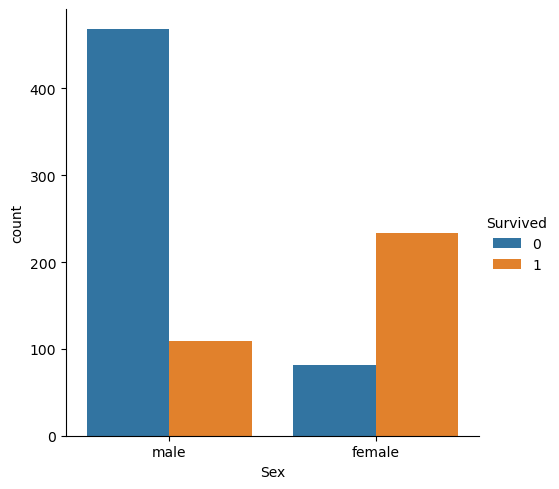

In [8]:
sns.catplot(x="Sex",hue="Survived",kind="count",data=data)
plt.show()

In [9]:
#AGE

print(f"before Null values: {data.Age.isnull().sum()} \n")

#remove/replace null values
data.Age = data.Age.fillna(int(np.mean(data.Age)))


print(f"After remove total Null values are: {data.Age.isnull().sum()}")

before Null values: 177 

After remove total Null values are: 0


In [10]:
#cabin

print(f"before Null values: {data.Cabin.isnull().sum()} \n")

#remove/replace null values
data.Cabin = data.Cabin.fillna("Unknown Cabin")


print(f"After remove total Null values are: {data.Cabin.isnull().sum()}")

before Null values: 687 

After remove total Null values are: 0


In [11]:
#Embarked 

print(f"before Null values: {data.Embarked.isnull().sum()} \n")

#remove/replace null values
data.dropna(inplace=True)


print(f"After remove total Null values are: {data.Embarked.isnull().sum()}")

before Null values: 2 

After remove total Null values are: 0


In [12]:
for i in columns:
    print(f"{i} have {data[i].isnull().sum()} null values")

PassengerId have 0 null values
Survived have 0 null values
Pclass have 0 null values
Name have 0 null values
Sex have 0 null values
Age have 0 null values
SibSp have 0 null values
Parch have 0 null values
Ticket have 0 null values
Fare have 0 null values
Cabin have 0 null values
Embarked have 0 null values


In [13]:
data.shape

(889, 12)

In [14]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data.Sex=encoder.fit_transform(data["Sex"])
data.Embarked=encoder.fit_transform(data["Embarked"])

In [15]:
dataset = data[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [16]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [17]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)
X

array([[ 0.82520863,  0.73534203, -0.57964299, ..., -0.47432585,
        -0.50023975,  0.58683958],
       [-1.57221121, -1.35991138,  0.65458337, ..., -0.47432585,
         0.78894661, -1.93955453],
       [ 0.82520863, -1.35991138, -0.2710864 , ..., -0.47432585,
        -0.48664993,  0.58683958],
       ...,
       [ 0.82520863, -1.35991138, -0.03966896, ...,  2.00611934,
        -0.17408416,  0.58683958],
       [-1.57221121,  0.73534203, -0.2710864 , ..., -0.47432585,
        -0.0422126 , -1.93955453],
       [ 0.82520863,  0.73534203,  0.19174848, ..., -0.47432585,
        -0.49017322, -0.67635748]])

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.25)

In [19]:
print(x_train.shape)
print(y_train.shape)

(666, 7)
(666,)


In [20]:
print(x_test.shape)
print(y_test.shape)

(223, 7)
(223,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()

model1.fit(x_train,y_train)

x_train_pred = model1.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy )

x_test_pred = model1.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy )

Accuracy on Training data:  0.8003003003003003
Accuracy on Testing data:  0.7802690582959642


In [22]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()

model2.fit(x_train,y_train)

x_train_pred = model2.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy )

x_test_pred = model2.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy )

Accuracy on Training data:  0.9774774774774775
Accuracy on Testing data:  0.8026905829596412


In [23]:

input_data =(1,0,35.0,1,0,53.1000,2)

input_data_to_array = np.asarray(input_data)

X = input_data_to_array.reshape(1,-1)

predication = model1.predict(X)

print(predication)

if predication[0] == 0:
    print("No possible to Survived")
    
else:
    print("Survived")

[0]
No possible to Survived


In [ ]:
dataset.to_csv("Titanic_Dataset.csv")